In [1]:
import pandas as pd
from scipy.spatial import distance

#https://www.google.com/covid19/mobility/
url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df20 = pd.read_csv(url2020)
df20.info()
df21 = pd.read_csv(url2021)
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                                                167657 non-n

In [2]:
# 1. Soru 

ddf20 = df20.dropna(axis=1, how='all')
ddf21 = df21.dropna(axis=1, how='all')

In [4]:
import numpy as np 
from scipy.spatial import distance
import math
import matplotlib.pyplot as plt

In [54]:
#3 a
df20 = df20.set_index(pd.DatetimeIndex(pd.to_datetime(df20['date'].values)).month)
df20.index.name = "Aylar"
df21 = df21.set_index(pd.DatetimeIndex(pd.to_datetime(df21['date'].values)).month)
df21.index.name = "Aylar"

m20 = df20.iloc[:, 9:15].groupby("Aylar").mean()
m21 = df21.iloc[:, 9:15].groupby("Aylar").mean()


In [79]:
m21

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Aylar,,,,,,
1,-50.178609,-4.892954,-34.120820,-40.967841,-31.960336,13.586489
2,-41.179696,10.830794,-22.787913,-31.025378,-25.911408,9.778199
3,-24.850222,24.720614,-8.019031,-20.468370,-13.891509,6.377278
4,-35.502006,21.478576,-13.863790,-27.611852,-23.792819,11.048254
5,-41.302671,13.629981,-11.967062,-31.783479,-33.632010,12.395152
6,1.851735,47.980315,39.925513,8.431063,-10.437586,0.311459
7,26.966805,61.709726,86.983643,40.417973,-17.413158,-2.827990
8,26.708902,58.990142,73.931242,34.897984,-8.252919,-2.106539
9,24.913273,62.677302,52.151012,25.758633,-0.748786,-1.655904


In [55]:
euclidean = []

for row in range(12):
    euclidean.append([])
    for col in range(6):
        try:
            euclidean[row].append(distance.euclidean(m20.iloc[row, col], m21.iloc[row, col]))
        except:
            euclidean[row].append(np.nan)

max = np.nanmax(euclidean)

euclidean = 1 - np.array(euclidean)/max
euclidean

sim_euclidean = []
for i in range(6):
    sim_euclidean.append(np.nanmean(euclidean.T[i]))

sim_euclidean

[0.3755322864097813,
 0.34698277442829734,
 0.4424597144254244,
 0.4037947603426028,
 0.6980320667624813,
 0.8688998673684475]

In [52]:
canberra = []

for row in range(12):
    canberra.append([])
    for col in range(6):
        try:
            canberra[row].append(distance.canberra(m20.iloc[row, col], m21.iloc[row, col]))
        except:
            canberra[row].append(np.nan)

max = np.nanmax(canberra)

canberra = 1 - np.array(canberra)/max
canberra

sim_canberra = []
for i in range(6):
    sim_canberra.append(np.nanmean(canberra.T[i]))

sim_canberra

[0.2644464274171915,
 0.27421166416240783,
 0.44752696009288273,
 0.30213643725890293,
 0.5281231233386842,
 0.29330747825313175]

In [92]:
chebyshev = []

for row in range(12):
    if row == 0 or row == 10 or row == 11:
        chebyshev.append([0]*6)
        continue
    chebyshev.append([])
    for col in range(6):
        chebyshev[row].append(distance.chebyshev(m20.iloc[:, col].loc[row + 1], m21.iloc[:, col].loc[row + 1]))


max = np.nanmax(chebyshev)

chebyshev = 1 - np.array(chebyshev)/max

sim_chebyshev = []
for i in range(6):
    sim_chebyshev.append(np.nanmean(chebyshev.T[i]))

sim_chebyshev

[0.5999469383841064,
 0.4630231158406111,
 0.7614201873695966,
 0.5855036875125089,
 0.8362779074991877,
 0.9329180243822494]

In [36]:
m20

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Aylar,,,,,,
2,2.028130,3.238759,4.509374,-6.643751,9.353484,-0.698443
3,-21.700010,-4.395083,-6.153226,-22.896115,-12.652553,6.332819
4,-63.148836,-26.497847,-42.117354,-64.418867,-47.539997,20.742720
5,-55.673896,-15.239506,-28.837900,-58.020520,-41.539711,17.455508
6,-18.156210,12.410230,32.502002,-17.117761,-10.425022,4.339668
7,-6.876458,15.260359,55.750799,-1.882360,-10.858957,-0.082189
8,-9.014545,9.800086,60.977582,1.375155,-16.412747,-0.669343
9,-13.071653,10.092360,38.977984,-11.851192,-11.053215,2.389219
10,-13.590351,19.569650,30.077698,-10.521094,-8.295500,3.886670


In [37]:
m21

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Aylar,,,,,,
1,-50.178609,-4.892954,-34.120820,-40.967841,-31.960336,13.586489
2,-41.179696,10.830794,-22.787913,-31.025378,-25.911408,9.778199
3,-24.850222,24.720614,-8.019031,-20.468370,-13.891509,6.377278
4,-35.502006,21.478576,-13.863790,-27.611852,-23.792819,11.048254
5,-41.302671,13.629981,-11.967062,-31.783479,-33.632010,12.395152
6,1.851735,47.980315,39.925513,8.431063,-10.437586,0.311459
7,26.966805,61.709726,86.983643,40.417973,-17.413158,-2.827990
8,26.708902,58.990142,73.931242,34.897984,-8.252919,-2.106539
9,24.913273,62.677302,52.151012,25.758633,-0.748786,-1.655904


In [105]:
import math
s20 = df20.iloc[:, 9:15].sample(n=800)

s20 = s20.groupby("Aylar").mean()
error_4_sum = 0
for row in range(12):
    if row == 0 or row == 10 or row == 11:
        continue
    for column in range(len(s20.columns)):
            error_4_sum += math.fabs(np.nansum(m20.iloc[:, column].loc[row + 1] - s20.iloc[:, column].loc[row + 1]))
        
error_4 = error_4_sum / (9 * 6)
print("Error : ", error_4)


Error :  2.419382454253914


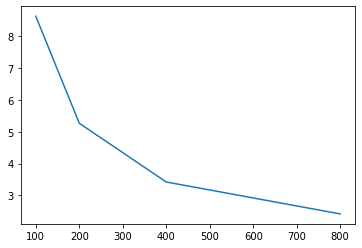

In [106]:
import matplotlib.pyplot as plt
x = [100, 200, 400, 800]
y = [8.632518996300837, 5.269446066604378, 3.423128240613597, 2.419382454253914]
plt.plot(x, y)


In [108]:
arr = [3, np.nan, 5]
np.nanmean(arr)


4.0